In [41]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [43]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

In [44]:
#data
rawData = pd.read_csv('Credit_One_Data.csv')
rawData.drop(rawData.columns[0], axis=1, inplace=True)

rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,DEFAULTED_NMOS,DEFAULTED
0,20000,1,1,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,0,2,1
1,120000,1,1,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,0,2,1
2,90000,1,1,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,1,0,0
3,50000,1,1,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,1,0,0
4,50000,0,1,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,1,0,0


In [45]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   2396 non-null   int64
 1   SEX                         2396 non-null   int64
 2   EDUCATION                   2396 non-null   int64
 3   MARRIAGE                    2396 non-null   int64
 4   AGE                         2396 non-null   int64
 5   PAY_1                       2396 non-null   int64
 6   PAY_2                       2396 non-null   int64
 7   PAY_3                       2396 non-null   int64
 8   PAY_4                       2396 non-null   int64
 9   PAY_5                       2396 non-null   int64
 10  PAY_6                       2396 non-null   int64
 11  BILL_AMT1                   2396 non-null   int64
 12  BILL_AMT2                   2396 non-null   int64
 13  BILL_AMT3                   2396 non-null   int64
 14  BILL_AMT

Selecting features based on correlation

In [46]:
#generating the correlation matrix
corr = rawData.corr()

<AxesSubplot:>

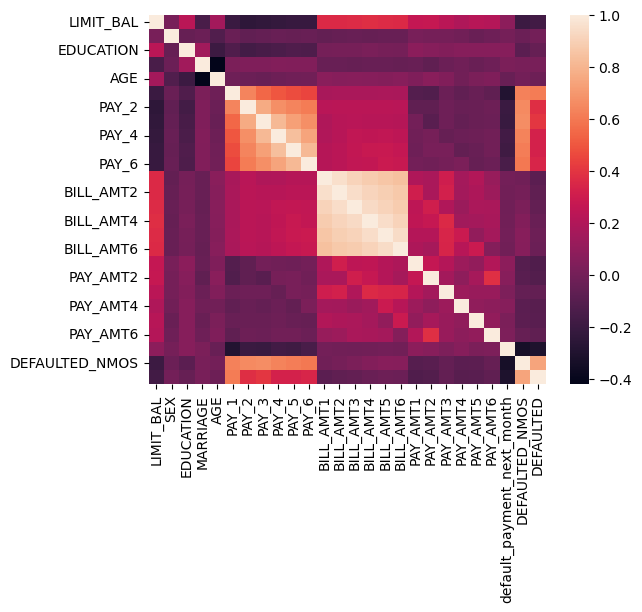

In [47]:
#generating the correlation heatmap
sns.heatmap(corr)

In [48]:
#remove features with correlation higher than .9

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = rawData.columns[columns]

data = rawData[selected_columns]

In [78]:
columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [50]:
#selecting columns based on p-value

selected_columns = selected_columns[1:].values

In [51]:
selected_columns

array(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month', 'DEFAULTED_NMOS', 'DEFAULTED'],
      dtype=object)

In [52]:
import statsmodels.regression.linear_model as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [53]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

In [54]:
result = pd.DataFrame()
result['LIMIT_BAL'] = data.iloc[:,0]

In [55]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

<AxesSubplot:>

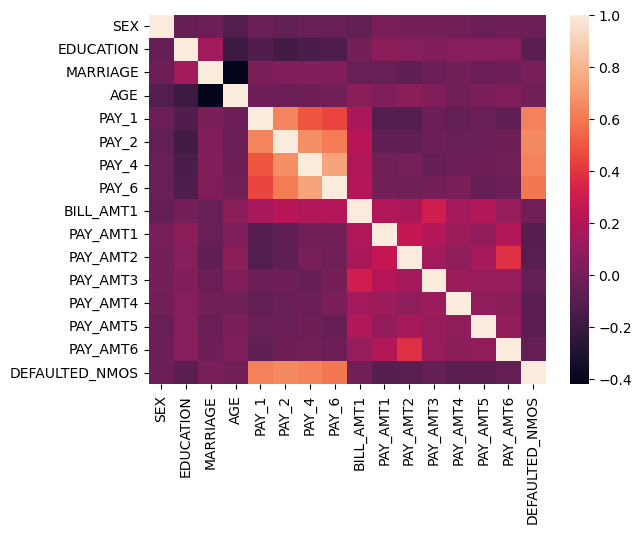

In [81]:
sns.heatmap(data.corr())

In [65]:
rawData

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,DEFAULTED_NMOS,DEFAULTED
0,20000,1,1,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,0,2,1
1,120000,1,1,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,0,2,1
2,90000,1,1,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,1,0,0
3,50000,1,1,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,1,0,0
4,50000,0,1,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,50000,0,0,1,32,2,3,2,2,2,...,44960,1500,1600,1700,1500,3600,0,0,6,1
2392,20000,1,0,2,49,0,0,2,0,-1,...,0,3008,0,600,1150,0,0,1,1,1
2393,130000,1,1,2,24,1,-2,-1,-1,-1,...,937,0,3372,0,1001,939,1013,1,1,1
2394,110000,1,0,1,27,0,0,0,0,0,...,47141,2326,3000,1807,1698,1911,1808,1,0,0


C:\Users\higgi\AppData\Local\Temp\ipykernel_19224\1224656038.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i][result['LIMIT_BAL']!=1], color='g', label = 'current')
C:\Users\higgi\AppData\Local\Temp\ipykernel_19224\1224656038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i]

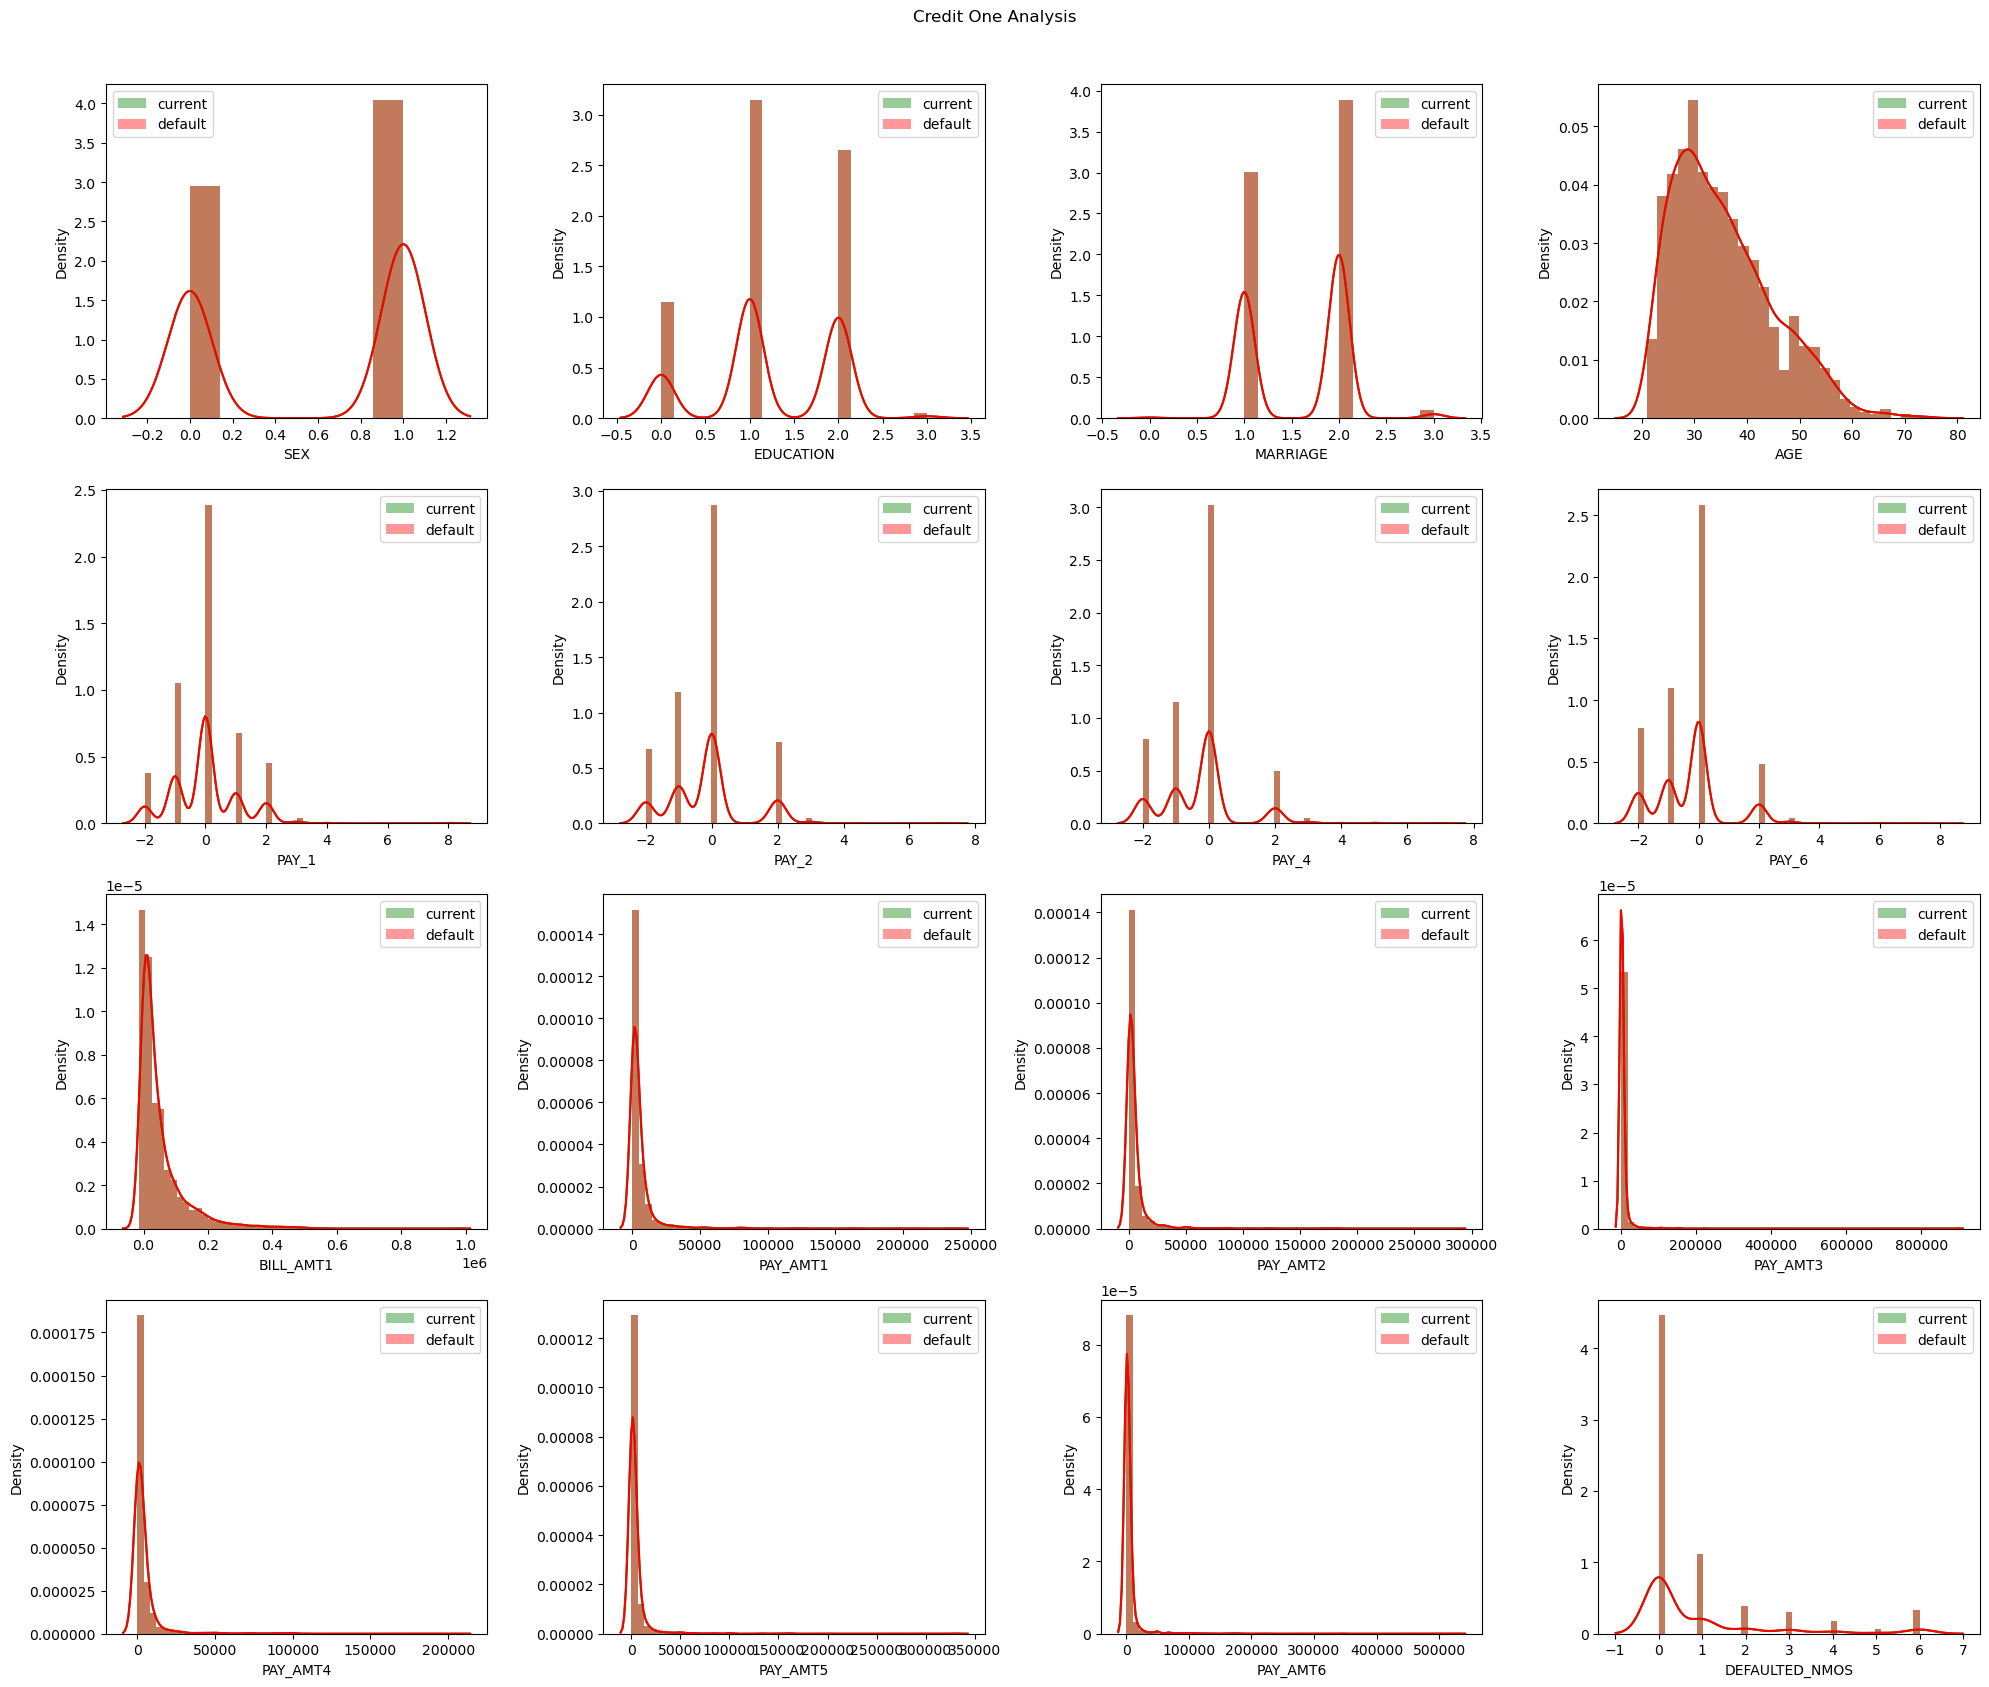

In [69]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['LIMIT_BAL']!=1], color='g', label = 'current')
    sns.distplot(data[i][result['LIMIT_BAL']!=1], color='r', label = 'default')
    plt.legend(loc='best')
fig.suptitle('Credit One Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [70]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)

In [74]:
y_train

array([[210000],
       [ 50000],
       [200000],
       ...,
       [240000],
       [170000],
       [ 80000]], dtype=int64)

In [72]:
from sklearn.svm import SVC
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)

C:\Users\higgi\.conda\envs\Course2\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [75]:
prediction = svc.predict(x_test)

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

0.18541666666666667


In [82]:
#dependent variable
y = rawData['LIMIT_BAL']

In [83]:
model = LinearRegression(n_jobs=100)

In [84]:
print(y)

0        20000
1       120000
2        90000
3        50000
4        50000
         ...  
2391     50000
2392     20000
2393    130000
2394    110000
2395    200000
Name: LIMIT_BAL, Length: 2396, dtype: int64


In [85]:
#features
X = data
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_4,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTED_NMOS
0,1,1,1,24,2,2,-1,-2,3913,0,689,0,0,0,0,2
1,1,1,2,26,-1,2,0,2,2682,0,1000,1000,1000,0,2000,2
2,1,1,2,34,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,0
3,1,1,1,37,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,0
4,0,1,1,57,-1,0,0,0,8617,2000,36681,10000,9000,689,679,0


In [86]:
print(cross_val_score(model, X, y, cv=100))

[ 0.32502347  0.66762096  0.10456948  0.37114487  0.42069422  0.36897211
  0.39324596  0.53526224  0.51802749  0.47921466  0.27522069  0.31758616
  0.32019086  0.56525052 -0.15174284  0.49367271  0.53308449  0.512099
  0.45793195  0.17728693  0.27695591  0.33103797  0.36420166  0.14392788
  0.41354172  0.21359587  0.51405077  0.11303962  0.31131668  0.37895571
  0.37867852 -0.09108561  0.32816571  0.26381093  0.14504746  0.33795056
  0.40513117  0.40520858  0.16126216  0.22805179  0.46976859  0.30406786
  0.29692612  0.21296393  0.4494063   0.46810645  0.47177264  0.44998115
  0.13289667  0.38795673  0.53594212  0.3549848  -0.0407883   0.04025822
  0.33264214  0.39161156  0.68125672 -0.14189219  0.26426842  0.19518845
  0.30648633  0.47539731  0.65967062  0.55077122  0.37454288  0.1615777
  0.14122123  0.32248046  0.32690546  0.4359311   0.47766956  0.32898162
  0.36983857  0.10360255  0.13612711  0.1972661   0.52466356  0.42980399
 -0.22323805  0.343839    0.39282638  0.31040613  0.37

In [87]:
algosClass = []

In [88]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

In [89]:
algosClass.append(('Linear Regression',LinearRegression()))

In [90]:
algosClass.append(('Support Vector Regression', SVR()))

In [91]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [92]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.42624999231543476
Linear Regression 0.3739594728121873
Support Vector Regression -0.03945528236501302


In [316]:
#algo = RandomForestRegressor()
#algo = LinearRegression()
algo = SVR()

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20)

In [318]:
model = algo.fit(X_train,y_train)

In [319]:
#make predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.044
RMSE: 136175.852


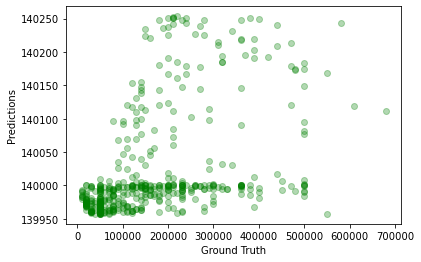

In [320]:
plt.scatter(y_test, predictions, c='green', alpha = .3)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show();

Questions:

Did any of the algorithms provide reasonable or acceptable results? 

#rf
R Squared: 0.467
RMSE: 96606.683

#lr 
R Squared: 0.328
RMSE: 99654.901

#svr R Squared: -0.066
RMSE: 137428.085

The Random Forest was the best overall, and SVR was the worst. The R2 value for the random forest model was .467, implying that only 46.7% of the variance in the dependent variable (LIMIT_BAL) is explained by the independent variables in the regression model. 

Can this problem be addressed or approached in a different manner that might work better?
I could possibly tweak the independent variable selection. I might be able to combine and categorize some of the indepenedent variables.

Is there some way to still use credit limit as the dependent variable, but solve this as a different machine learning problem?
This is a regression problem and could possibly be solved as a categorization problem. 

If not, what can be done to satisfy the client's needs and business scope? (Hint: They listed a minimum requirement).
Instead of approving a credit limit, maybe reduce it to a yes/no decision on granting credit.